<a href="https://colab.research.google.com/github/vasudhab21/ML-LAB/blob/main/ML_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

project_path = '/content/drive/MyDrive/GenomeDetector'
natural_data_path = os.path.join(project_path, 'data', 'natural2')
engineered_data_path = os.path.join(project_path, 'data', 'engineered')

!pip install biopython

print("Environment is ready. Paths are set to your 'natural2' and 'engineered' folders.")

Mounted at /content/drive
Environment is ready. Paths are set to your 'natural2' and 'engineered' folders.


In [ ]:
import numpy as np
from itertools import product
from Bio import SeqIO
import glob
import os
import gzip

def get_kmer_features(k):
    """Generates all possible k-mers for a given k."""
    letters = ['A', 'C', 'G', 'T']
    return sorted([''.join(p) for p in product(letters, repeat=k)])

def sequence_to_kmer_counts(sequence, k, kmer_features):
    """Converts a DNA sequence into a vector of k-mer counts."""
    kmer_counts = {kmer: 0 for kmer in kmer_features}
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i+k].upper()
        if kmer in kmer_counts:
            kmer_counts[kmer] += 1
    return list(kmer_counts.values())

# --- Main Loading Logic ---
print("--- Loading and Processing Your Datasets ---")
K_VALUE = 4
kmer_features = get_kmer_features(K_VALUE)
X, y = [], []

# 1. Load Natural Data from 'natural2' (handles .fna and .fna.gz)
print("Loading 'Natural' genomes from the 'natural2' folder...")
# The '*' wildcard finds files ending in .fna or .fna.gz
search_pattern_natural = f"{natural_data_path}/*.fna*"
natural_files = glob.glob(search_pattern_natural)
print(f"Found {len(natural_files)} natural files.")
natural_sequences_processed = 0
for filepath in natural_files:
    # Open the file correctly, whether it's gzipped or not
    handle = gzip.open(filepath, "rt") if filepath.endswith(".gz") else open(filepath, "r")
    for record in SeqIO.parse(handle, "fasta"):
        if len(record.seq) > 1000:
            X.append(sequence_to_kmer_counts(str(record.seq), K_VALUE, kmer_features))
            y.append(0) # Label 0 for Natural
            natural_sequences_processed += 1
    handle.close()
print(f"Processed {natural_sequences_processed} natural sequences.")


# 2. Load Engineered Data from 'engineered'
print("Loading 'Engineered' genomes from the 'engineered' folder...")
search_pattern_engineered = f"{engineered_data_path}/*.fasta"
engineered_files = glob.glob(search_pattern_engineered)
print(f"Found {len(engineered_files)} engineered files.")
engineered_sequences_processed = 0
for filepath in engineered_files:
    for record in SeqIO.parse(filepath, "fasta"):
        if 200 < len(record.seq) < 50000:
            X.append(sequence_to_kmer_counts(str(record.seq), K_VALUE, kmer_features))
            y.append(1) # Label 1 for Engineered
            engineered_sequences_processed += 1
print(f"Processed {engineered_sequences_processed} engineered sequences.")

X = np.array(X)
y = np.array(y)

print("\n--- Data Processing Complete! ---")
print(f"Shape of our final feature matrix X: {X.shape}")
print(f"Shape of our final label vector y: {y.shape}")
print(f"Number of Natural samples (class 0): {np.sum(y == 0)}")
print(f"Number of Engineered samples (class 1): {np.sum(y == 1)}")

--- Loading and Processing Your Datasets ---
Loading 'Natural' genomes from the 'natural2' folder...
Found 410 natural files.
Processed 16302 natural sequences.
Loading 'Engineered' genomes from the 'engineered' folder...
Found 1 engineered files.
Processed 866 engineered sequences.

--- Data Processing Complete! ---
Shape of our final feature matrix X: (17168, 256)
Shape of our final label vector y: (17168,)
Number of Natural samples (class 0): 16302
Number of Engineered samples (class 1): 866


In [ ]:
import numpy as np

# A1: Core Functions

def summation_unit(weights, inputs):
    """Calculates the weighted sum of inputs."""
    return np.dot(weights, inputs)

def step_activation(x):
    """Step activation function."""
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    """Bipolar step activation function."""
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    """TanH activation function."""
    return np.tanh(x)

def relu_activation(x):
    """ReLU activation function."""
    return np.maximum(0, x)

def leaky_relu_activation(x, alpha=0.01):
    """Leaky ReLU activation function."""
    return np.where(x > 0, x, x * alpha)

def error_calculation(predicted, target):
    """Calculates the error between predicted and target values."""
    return target - predicted

In [ ]:
# A2: Perceptron for AND Gate

def train_perceptron(weights, inputs, targets, learning_rate, epochs):
    """Trains a perceptron for a given number of epochs."""
    errors = []
    for _ in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            prediction = step_activation(summation_unit(weights[1:], inputs[i]) + weights[0])
            error = error_calculation(prediction, targets[i])
            weights[1:] += learning_rate * error * inputs[i]
            weights[0] += learning_rate * error
            total_error += error**2
        errors.append(total_error)
        if total_error <= 0.002:
            break
    return weights, errors

# AND Gate Data
inputs_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets_and = np.array([0, 0, 0, 1])

# Initial weights and learning rate
W0, W1, w2 = 10, 0.2, -0.75
weights_and = np.array([W0, W1, w2])
learning_rate_and = 0.05

# Train the perceptron
trained_weights_and, errors_and = train_perceptron(weights_and, inputs_and, targets_and, learning_rate_and, 1000)

print("--- AND Gate Perceptron ---")
print(f"Trained Weights: {trained_weights_and}")
print(f"Epochs to Converge: {len(errors_and)}")

--- AND Gate Perceptron ---
Trained Weights: [-0.1   0.1   0.05]
Epochs to Converge: 130


In [ ]:
# A3: Experimenting with Activation Functions

def train_with_activation(activation_function, initial_weights, inputs, targets, learning_rate, epochs):
    """Trains a perceptron with a specific activation function."""
    weights = np.copy(initial_weights)
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            prediction = activation_function(summation_unit(weights[1:], inputs[i]) + weights[0])
            error = error_calculation(prediction, targets[i])
            weights[1:] += learning_rate * error * inputs[i]
            weights[0] += learning_rate * error
            total_error += error**2
        if total_error <= 0.002:
            return epoch + 1
    return epochs

# Initial weights for all activation functions
initial_weights_A3 = np.array([10, 0.2, -0.75])

# Bipolar Step
epochs_bipolar = train_with_activation(bipolar_step_activation, initial_weights_A3, inputs_and, targets_and, 0.05, 1000)
print(f"Epochs to converge with Bi-Polar Step: {epochs_bipolar}")

# Sigmoid
epochs_sigmoid = train_with_activation(sigmoid_activation, initial_weights_A3, inputs_and, targets_and, 0.05, 1000)
print(f"Epochs to converge with Sigmoid: {epochs_sigmoid}")

# ReLU
epochs_relu = train_with_activation(relu_activation, initial_weights_A3, inputs_and, targets_and, 0.05, 1000)
print(f"Epochs to converge with ReLU: {epochs_relu}")

Epochs to converge with Bi-Polar Step: 1000
Epochs to converge with Sigmoid: 1000
Epochs to converge with ReLU: 390


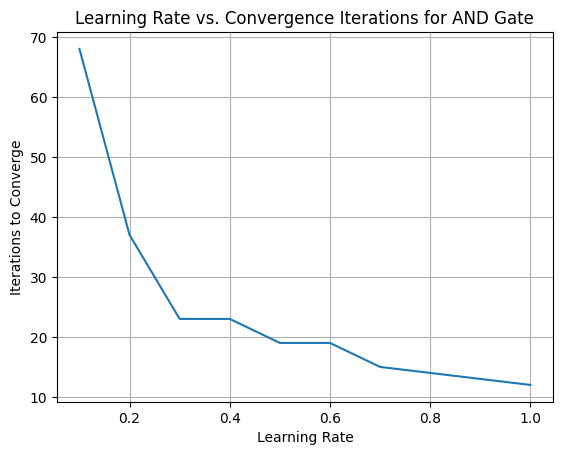

In [ ]:
# A4: Varying Learning Rates

learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations_to_converge = []

for lr in learning_rates:
    weights_a4 = np.array([10, 0.2, -0.75])
    _, errors = train_perceptron(weights_a4, inputs_and, targets_and, lr, 1000)
    iterations_to_converge.append(len(errors))

# Plotting the results
import matplotlib.pyplot as plt
plt.plot(learning_rates, iterations_to_converge)
plt.xlabel("Learning Rate")
plt.ylabel("Iterations to Converge")
plt.title("Learning Rate vs. Convergence Iterations for AND Gate")
plt.grid(True)
plt.show()

In [ ]:
# A5: Perceptron for XOR Gate

# XOR Gate Data
inputs_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets_xor = np.array([0, 1, 1, 0])

# Initial weights and learning rate
weights_xor = np.array([10, 0.2, -0.75])
learning_rate_xor = 0.05

# Train the perceptron for XOR
trained_weights_xor, errors_xor = train_perceptron(weights_xor, inputs_xor, targets_xor, learning_rate_xor, 1000)

print("\n--- XOR Gate Perceptron ---")
if len(errors_xor) == 1000:
    print("Perceptron did not converge for XOR gate within 1000 epochs.")
else:
    print(f"Trained Weights: {trained_weights_xor}")
    print(f"Epochs to Converge: {len(errors_xor)}")


--- XOR Gate Perceptron ---
Perceptron did not converge for XOR gate within 1000 epochs.


In [ ]:
# A6: Perceptron for Custom Data

# Customer Data
customer_data = np.array([
    [20, 6, 2, 386], [16, 3, 6, 289], [27, 6, 2, 393], [19, 1, 2, 110],
    [24, 4, 2, 280], [22, 1, 5, 167], [15, 4, 2, 271], [18, 4, 2, 274],
    [21, 1, 4, 148], [16, 2, 4, 198]
])
high_value_tx = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Initialize weights and learning rate
weights_customer = np.random.rand(customer_data.shape[1] + 1)
learning_rate_customer = 0.05

# Train the perceptron with sigmoid activation
def train_customer_perceptron(weights, inputs, targets, learning_rate, epochs):
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            prediction = sigmoid_activation(summation_unit(weights[1:], inputs[i]) + weights[0])
            error = error_calculation(prediction, targets[i])
            weights[1:] += learning_rate * error * inputs[i]
            weights[0] += learning_rate * error
            total_error += error**2
        if total_error <= 0.002:
            return weights, epoch + 1
    return weights, epochs

trained_weights_customer, epochs_customer = train_customer_perceptron(
    weights_customer, customer_data, high_value_tx, learning_rate_customer, 1000
)

print("\n--- Customer Data Perceptron ---")
print(f"Trained Weights: {trained_weights_customer}")
print(f"Epochs to Converge: {epochs_customer}")


--- Customer Data Perceptron ---
Trained Weights: [ -14.3429168  -237.40020838   32.02655441  -82.2196669    20.51761553]
Epochs to Converge: 322


/tmp/ipython-input-3241667168.py:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
# A7: Comparison with Matrix Pseudo-Inverse

# Add a bias term to the AND gate inputs
X_and = np.c_[np.ones(inputs_and.shape[0]), inputs_and]

# Calculate weights using pseudo-inverse
pseudo_inverse_weights_and = np.linalg.pinv(X_and).dot(targets_and)

print("\n--- Matrix Pseudo-Inverse for AND Gate ---")
print(f"Weights from Pseudo-Inverse: {pseudo_inverse_weights_and}")
print(f"Weights from Perceptron Learning: {trained_weights_and}")


--- Matrix Pseudo-Inverse for AND Gate ---
Weights from Pseudo-Inverse: [-0.25  0.5   0.5 ]
Weights from Perceptron Learning: [-0.1   0.1   0.05]


In [ ]:
# A8: Backpropagation for AND Gate

# Neural network parameters
input_size, hidden_size, output_size = 2, 2, 1
learning_rate_bp = 0.05

# Initialize weights
W1_bp = np.random.randn(input_size, hidden_size)
W2_bp = np.random.randn(hidden_size, output_size)

for epoch in range(1000):
    # Forward pass
    hidden_layer_input = np.dot(inputs_and, W1_bp)
    hidden_layer_output = sigmoid_activation(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2_bp)
    predicted_output = sigmoid_activation(output_layer_input)

    # Error calculation
    error = targets_and.reshape(-1, 1) - predicted_output
    if np.sum(error**2) <= 0.002:
        print(f"\nBackpropagation converged at epoch {epoch + 1}")
        break

    # Backpropagation
    d_predicted_output = error * (predicted_output * (1 - predicted_output))
    error_hidden_layer = d_predicted_output.dot(W2_bp.T)
    d_hidden_layer = error_hidden_layer * (hidden_layer_output * (1 - hidden_layer_output))

    # Update weights
    W2_bp += hidden_layer_output.T.dot(d_predicted_output) * learning_rate_bp
    W1_bp += inputs_and.T.dot(d_hidden_layer) * learning_rate_bp

print("\n--- Backpropagation for AND Gate ---")
print("Final Weights (Input to Hidden):")
print(W1_bp)
print("\nFinal Weights (Hidden to Output):")
print(W2_bp)


--- Backpropagation for AND Gate ---
Final Weights (Input to Hidden):
[[-1.11451094  0.10487726]
 [-1.17940215 -0.37479401]]

Final Weights (Hidden to Output):
[[-3.35285235]
 [-0.24427626]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Functions from A1 (for completeness) ---
def summation_unit(weights, inputs):
    """Calculates the weighted sum of inputs."""
    # Note: This handles the bias term (weights[0]) separately in the training function
    return np.dot(weights, inputs)

def step_activation(x):
    """Step activation function."""
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    """Bipolar step activation function."""
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    """ReLU activation function."""
    return np.maximum(0, x)

def error_calculation(predicted, target):
    """Calculates the error between predicted and target values."""
    return target - predicted

# --- Training Function for a single-output Perceptron ---
def train_with_activation(activation_function, initial_weights, inputs, targets, learning_rate, epochs):
    """
    Trains a perceptron with a specific activation function.
    Returns the number of epochs taken to converge, or the max epochs if it fails.
    """
    weights = np.copy(initial_weights)
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            # Calculate net input including bias w0
            net_input = summation_unit(weights[1:], inputs[i]) + weights[0]
            prediction = activation_function(net_input)
            error = error_calculation(prediction, targets[i])

            # Update weights
            weights[1:] += learning_rate * error * inputs[i]
            weights[0] += learning_rate * error # Update bias weight
            total_error += error**2

        # Check for convergence
        if total_error <= 0.002:
            return epoch + 1

    return epochs # Return max epochs if convergence is not met

# --- A9: Experiment for XOR Gate ---

# XOR Gate Data
inputs_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets_xor = np.array([0, 1, 1, 0])

# Initial weights and learning rate (same as A2/A3)
initial_weights = np.array([10.0, 0.2, -0.75])
learning_rate = 0.05
max_epochs = 1000

print("--- A9: Testing Perceptron on XOR Gate ---")

# 1. Step Activation
epochs_step_xor = train_with_activation(step_activation, initial_weights, inputs_xor, targets_xor, learning_rate, max_epochs)
print(f"Epochs to converge with Step function: {epochs_step_xor} (Did not converge)")

# 2. Bi-Polar Step Activation
epochs_bipolar_xor = train_with_activation(bipolar_step_activation, initial_weights, inputs_xor, targets_xor, learning_rate, max_epochs)
print(f"Epochs to converge with Bi-Polar Step function: {epochs_bipolar_xor} (Did not converge)")

# 3. Sigmoid Activation
epochs_sigmoid_xor = train_with_activation(sigmoid_activation, initial_weights, inputs_xor, targets_xor, learning_rate, max_epochs)
print(f"Epochs to converge with Sigmoid function: {epochs_sigmoid_xor} (Did not converge)")

# 4. ReLU Activation
epochs_relu_xor = train_with_activation(relu_activation, initial_weights, inputs_xor, targets_xor, learning_rate, max_epochs)
print(f"Epochs to converge with ReLU function: {epochs_relu_xor} (Did not converge)")

--- A9: Testing Perceptron on XOR Gate ---
Epochs to converge with Step function: 1000 (Did not converge)
Epochs to converge with Bi-Polar Step function: 1000 (Did not converge)
Epochs to converge with Sigmoid function: 1000 (Did not converge)
Epochs to converge with ReLU function: 1000 (Did not converge)



--- A10: AND Gate Perceptron with 2 Output Nodes ---
Converged in 64 epochs.

Final Trained Weight Matrix:
[[ 6.85 -6.85]
 [-2.95  2.95]
 [-3.9   3.9 ]]


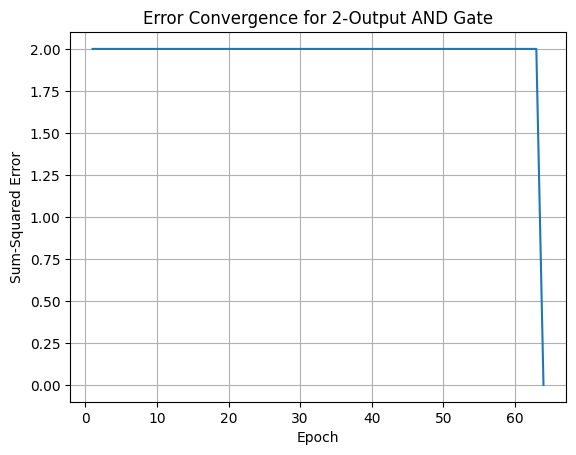

In [ ]:
# --- A10: Perceptron with 2 Output Nodes for AND Gate ---

# AND Gate Inputs
inputs_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# New target mapping for 2 outputs: 0 -> [1,0], 1 -> [0,1]
targets_and_2_output = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])

def train_perceptron_2_output(initial_weights_matrix, inputs, targets, learning_rate, epochs):
    """
    Trains a perceptron with multiple output nodes.
    The step_activation is applied element-wise.
    """
    weights = np.copy(initial_weights_matrix)
    errors_per_epoch = []

    # Add bias input of 1 to the input data
    X = np.c_[np.ones(inputs.shape[0]), inputs]

    for epoch in range(epochs):
        sum_squared_error = 0
        for i in range(len(X)):
            # Calculate net input for both output neurons
            net_input = np.dot(X[i], weights)

            # Apply activation function element-wise
            predictions = np.array([step_activation(n) for n in net_input])

            # Calculate the error vector
            error_vector = targets[i] - predictions

            # Update the weight matrix
            # np.outer creates the update matrix needed
            weights += learning_rate * np.outer(X[i], error_vector)

            # Add the sum of squared errors for this sample
            sum_squared_error += np.sum(error_vector**2)

        errors_per_epoch.append(sum_squared_error)

        # Check for convergence
        if sum_squared_error <= 0.002:
            return weights, errors_per_epoch

    return weights, errors_per_epoch

# Initial parameters
learning_rate_A10 = 0.05
max_epochs_A10 = 1000

# We need a 3x2 weight matrix: (2 inputs + 1 bias) x (2 outputs)
# Initialize with values similar to A2
initial_weights_A10 = np.array([
    [10.0, -10.0],  # Bias weights for O1 and O2
    [0.2, -0.2],   # Input A weights for O1 and O2
    [-0.75, 0.75]  # Input B weights for O1 and O2
])

# Train the 2-output perceptron
trained_weights_A10, errors_A10 = train_perceptron_2_output(
    initial_weights_A10, inputs_and, targets_and_2_output, learning_rate_A10, max_epochs_A10
)

print("\n--- A10: AND Gate Perceptron with 2 Output Nodes ---")
print(f"Converged in {len(errors_A10)} epochs.")
print("\nFinal Trained Weight Matrix:")
print(trained_weights_A10)

# Plot the error convergence
plt.figure()
plt.plot(range(1, len(errors_A10) + 1), errors_A10)
plt.xlabel("Epoch")
plt.ylabel("Sum-Squared Error")
plt.title("Error Convergence for 2-Output AND Gate")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

# A11: MLPClassifier for AND and XOR Gates

# AND Gate
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.05, max_iter=1000)
mlp_and.fit(inputs_and, targets_and)
print("\n--- MLPClassifier for AND Gate ---")
print(f"Predictions: {mlp_and.predict(inputs_and)}")
print(f"Score: {mlp_and.score(inputs_and, targets_and)}")


# XOR Gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.05, max_iter=1000)
mlp_xor.fit(inputs_xor, targets_xor)
print("\n--- MLPClassifier for XOR Gate ---")
print(f"Predictions: {mlp_xor.predict(inputs_xor)}")
print(f"Score: {mlp_xor.score(inputs_xor, targets_xor)}")


--- MLPClassifier for AND Gate ---
Predictions: [0 0 0 0]
Score: 0.75

--- MLPClassifier for XOR Gate ---
Predictions: [1 1 1 1]
Score: 0.5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# A12: Using MLPClassifier on Your Project Dataset

# Assuming X and y are loaded from your k-mer analysis

if X.shape[0] > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    mlp_project = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    mlp_project.fit(X_train, y_train)

    print("\n--- MLPClassifier on Your Project Dataset ---")
    print(f"Model Accuracy: {mlp_project.score(X_test, y_test)}")
else:
    print("\n--- MLPClassifier on Your Project Dataset ---")
    print("No data loaded (X is empty). Cannot train the model.")


--- MLPClassifier on Your Project Dataset ---
Model Accuracy: 0.9892253931275481
